# <span style="color:#1F765C"><center> Starbucks Capstone Challenge </center></span>

<img src="images/logo.jpg"/>

# 1. Project Description

### 1.1 Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### 1.2 Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### 1.3 Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### 1.4 Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# 2. Dataset Description

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


# 3. Research Questions

1. What can be the potential demographic groups in user data?
2. What is the average income of each demographic group?
3. What is the average age of users?
4. How many distinct types of offers Starbucks has?
5. What are the distinct channels that Starbucks use to send an offer?



# 4. Solution

**- First things first - Import necessage packages/libraries**

In [459]:
import pandas as pd # for reading and manipulating json files
import numpy as np  # for numerical computing i.e, compute average, standard deviation
import matplotlib.pyplot as plt # for plotting graphs and charts

#to display plot inside jupyter notebook
%matplotlib inline 

# read in the json files
offer = pd.read_json('data/portfolio.json', orient='records', lines=True) 
user = pd.read_json('data/profile.json', orient='records', lines=True)    
transaction = pd.read_json('data/transcript.json', orient='records', lines=True)

pd.set_option('display.max_colwidth', -1)

**In order to tackle first question, I will explore user data.**

### 4.1 Explore user data (profile.json)

**- Dimension of data**

In [460]:
dim = user.shape
print("There are", dim[0],"rows and", dim[1],"columns in the user dataset.")

There are 17000 rows and 5 columns in the user dataset.


**- Top 5 rows**

In [461]:
user.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


**- Distribution of Data**

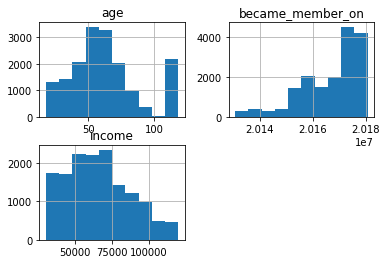

In [462]:
user.hist();

**- Column having null values**

In [463]:
null_col = user.isnull().sum() > 0
null_col

age                 False
became_member_on    False
gender              True 
id                  False
income              True 
dtype: bool

Out of 5 columns, gender and income columns contain null values.

**- Number of null values in gender column**

In [464]:
gender_null_count = user['gender'].isnull().sum()
gender_null_count

2175

**- Number of null values in income column**

In [465]:
income_null_count = user['income'].isnull().sum()
income_null_count

2175

**- Gender and income of customers whose age is greater than 100**

In [466]:
outliers_data = user[user['age']>100]
outliers_data['age'].value_counts()

118    2175
101    5   
Name: age, dtype: int64

**- Exact same count! Are these 2175 people same whose gender and income is unknown?**

In [467]:
outliers_data[outliers_data['age']==118].count()

age                 2175
became_member_on    2175
gender              0   
id                  2175
income              0   
dtype: int64

In [468]:
outliers_data[outliers_data['age']==118]['income'].isnull().sum()

2175

In [469]:
outliers_data[outliers_data['age']==118]['gender'].isnull().sum()

2175

**Yes, same data**

**- The proportion of null data**

In [470]:
user_not_null = user[(~user['gender'].isnull()) & (~user['income'].isnull())]
p = (user.shape[0]-user_not_null.shape[0])/user.shape[0]
p

0.12794117647058822

13% has null values.

**- Five number summary of age**

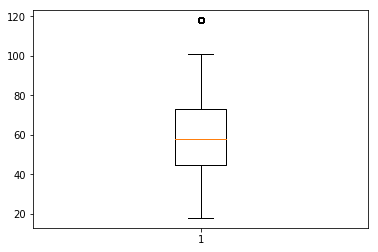

In [471]:
plt.boxplot(user.age);

There are few who know a century old stories!

The median age of users is 58. The maximum age is 118 and minimum age is 18.

**- Five number summary of income from not null data**

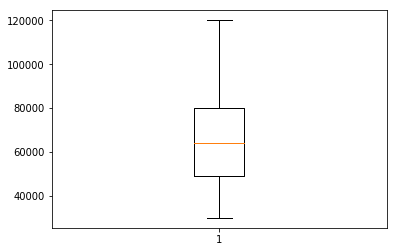

In [472]:
plt.boxplot(user_not_null.income);

The income of users lies in the range of (30000,120000), having average income about 64000.

**- Distribution of Gender**

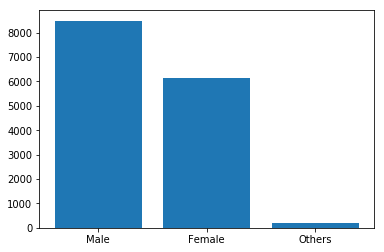

In [473]:
gender_count = list(user_not_null['gender'].value_counts())
labels = ['Male', 'Female', 'Others']
plt.bar(labels, gender_count);

**- Gender of users who earn more than or equals to average income**

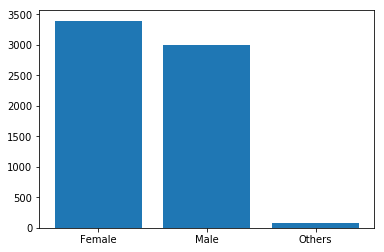

In [474]:
income_count = user_not_null[user_not_null['income']>=68000]['gender'].value_counts()
plt.bar(['Female','Male','Others'],list(income_count));

##### **Ans 1.**
The group division can be made based on following demographics:
    * Age group
    * Income group
    * Gender group

### 4.2 Explore offer data (portfolio.json)

**- Dimension of data**

In [475]:
offer.shape

(10, 6)

**- Display data**

In [476]:
offer

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


### 4.3 Explore transaction data (transcript.json)

**- Dimension of data**

In [477]:
transaction.shape

(306534, 4)

**- Top 5 rows**

In [478]:
transaction.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


**- First, I will merge columns from two different dataframes to avoid complex statements**

In [479]:
new_data = transaction.merge(user, how="left", left_on="person", right_on="id")

In [480]:
new_data.shape[0] == transaction.shape[0]

True

In [481]:
new_data.head(3)

,event,person,time,value,age,became_member_on,gender,id,income
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0


In [482]:
transaction.head(3)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}


**- Person id is repetitive column in new_data with column name as "person" and "id", thus I will drop it from new_data having column name id**

In [483]:
new_data = new_data.drop(columns=["id"])
new_data.head()

,event,person,time,value,age,became_member_on,gender,income
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},75,20170509,F,100000.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},118,20170804,None,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},68,20180426,M,70000.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},118,20170925,None,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},118,20171002,None,NaN


**- Distinct events**

In [484]:
distinct_events = new_data['event'].value_counts()
distinct_events

transaction        138953
offer received     76277 
offer viewed       57725 
offer completed    33579 
Name: event, dtype: int64

**- Top 3 rows for each distinct event**

In [485]:
new_data[new_data['event']=='transaction'].head(3)

,event,person,time,value,age,became_member_on,gender,income
12654,transaction,02c083884c7d45b39cc68e1314fec56c,0,{'amount': 0.8300000000000001},20,20160711,F,30000.0
12657,transaction,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,{'amount': 34.56},42,20160117,M,96000.0
12659,transaction,54890f68699049c2a04d415abc25e717,0,{'amount': 13.23},36,20171228,M,56000.0


In [486]:
new_data[new_data['event']=='offer received'].head(3)

,event,person,time,value,age,became_member_on,gender,income
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},75,20170509,F,100000.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},118,20170804,None,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},68,20180426,M,70000.0


In [487]:
new_data[new_data['event']=='offer viewed'].head(3)

,event,person,time,value,age,became_member_on,gender,income
12650,offer viewed,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},65,20180209,M,53000.0
12651,offer viewed,d1ede868e29245ea91818a903fec04c6,0,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},53,20170916,O,52000.0
12652,offer viewed,102e9454054946fda62242d2e176fdce,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},69,20160814,F,57000.0


In [488]:
new_data[new_data['event']=='offer completed'].head(3)

,event,person,time,value,age,became_member_on,gender,income
12658,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",42,20160117,M,96000.0
12672,offer completed,fe97aa22dd3e48c8b143116a8403dd52,0,"{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}",39,20171217,F,67000.0
12679,offer completed,629fc02d56414d91bca360decdfa9288,0,"{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}",52,20180605,M,72000.0


**- There is need to process value column in new_data**

How I am going to process this data?

- If the transaction event is offer received, then only offer id present. Thus, I will create a new column offer_id and add offer id value from dictionary in this column.

- If the transaction event is offer viewed, then again only offer id present. I will not create any column. However, i will add offer id value from dictionary in offer_id column.

- If the transaction event is offer completed, then again offer id present. There is also reward. So, I will create reward column. I will also add offer id value from dictionary in offer_id column and reward value from dictionary in reward column.

- If the transaction event is transaction, then amount spent column is present. So, I will create amount_spent column.

In total, I will create 3 columns. The first column being offer_id which will take null value if event is transaction. The second column will be reward which will be 0 when event is offer received, offer viewed or transaction. The last column is amount spent which will only contain value when event is a transaction.

In [489]:
offer_id_List = []
rewardList = []
amountList = []
for idx in range(new_data.shape[0]):
    offerId = ""
    reward = 0
    amount = 0
    if (new_data['event'][idx]=='offer received') | (new_data['event'][idx]=='offer viewed'):
        offerId = new_data['value'][idx]['offer id']
    
    if new_data['event'][idx]=='offer completed':
        offerId = new_data['value'][idx]['offer_id']
        reward = new_data['value'][idx]['reward']
            
    if new_data['event'][idx]=='transaction':
        amount = new_data['value'][idx]['amount']
        
    offer_id_List.append(offerId)
    rewardList.append(reward)
    amountList.append(amount)
    
new_data['offer_id'] = offer_id_List





In [490]:
new_data['reward'] = rewardList
new_data['amount_spent'] = amountList

In [491]:
new_data = new_data.drop(columns=['value'])
new_data.head(3)

,event,person,time,age,became_member_on,gender,income,offer_id,reward,amount_spent
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,75,20170509,F,100000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,118,20170804,None,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,68,20180426,M,70000.0,2906b810c7d4411798c6938adc9daaa5,0,0.0


**- Find out which gender receives more offer?**

In [492]:
a = new_data[new_data['event']=='offer received']['gender'].value_counts()

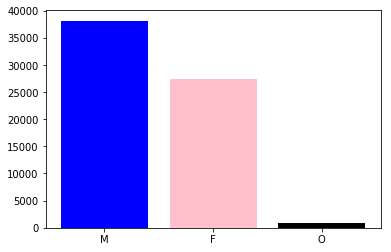

In [493]:
plt.bar(a.index, list(a), color=['blue','pink','black']);

**- Which gender spend more?**

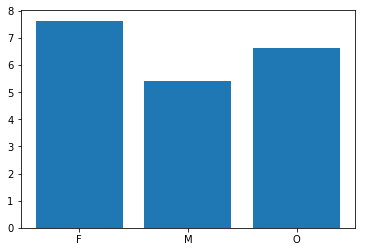

In [494]:
amountSpent = new_data.groupby('gender')['amount_spent'].mean()
plt.bar(amountSpent.index, list(amountSpent));

**- Which gender completes more offers?**

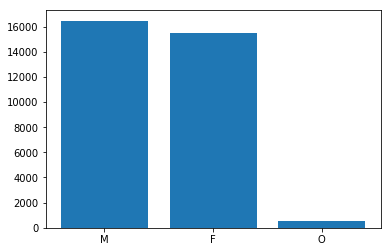

In [495]:
offer_complete = new_data[new_data['event']=='offer completed']['gender'].value_counts()
plt.bar(offer_complete.index, list(offer_complete));